# Seminar Applied Text Mining
## Session 1: Processing and exploring raw texts
## Notebook 3: Conditional word counting in song lyrics

### Importing packages

As always, we first need to load a number of required Python packages:
- `pandas` provides high-performance, easy-to-use data structures and data analysis tools.
- `NLTK` is a leading platform for building Python programs to work with human language data.
- `itertools` provides functions for creating iterators for efficient looping through data structures.
- `json` allows to read and write JSON files.
- `matplotlib` is a plotting library which produces publication quality figures.

In [1]:
import pandas as pd
import numpy as np
import itertools
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import json
import matplotlib.pyplot as plt

### Load documents
We load the lyrics of all songs which made it to the Billboard charts between 1964 and 2015. The data is in JSON Lines format (http://jsonlines.org/), so we must iterate over each line of the file and append it to a list called `corpus`.

In [2]:
file_path = 'billboard_lyrics_1964-2015.json'
corpus = []
with open(file_path) as f:
    for line in f:
        corpus.append(json.loads(line))

Show the first song of our dataset.

In [6]:
corpus[5000]

{u'Artist': u'mark ronson featuring bruno mars',
 u'Lyrics': u' this hit that ice cold michelle pfeiffer that white gold this one for them hood girls them good girls straight masterpieces stylin whilen livin it up in the city got chucks on with saint laurent got kiss myself im so prettyim too hot hot damn called a police and a fireman im too hot hot damn make a dragon wanna retire man im too hot hot damn say my name you know who i am im too hot hot damn am i bad bout that money break it downgirls hit your hallelujah whoo girls hit your hallelujah whoo girls hit your hallelujah whoo cause uptown funk gon give it to you cause uptown funk gon give it to you cause uptown funk gon give it to you saturday night and we in the spot dont believe me just watch come ondont believe me just watch uhdont believe me just watch dont believe me just watch dont believe me just watch dont believe me just watch hey hey hey oh    meaning  byamandah   editor    70s girl group the sequence accused bruno mars

### Preprocess songs
Same procedure as every time: tokenize ...

In [7]:
docs_tokenized = corpus[:]
for i, entry in enumerate(docs_tokenized):
    entry["Lyrics"] = nltk.word_tokenize(entry["Lyrics"])

In [8]:
docs_tokenized[0]

{u'Artist': u'sam the sham and the pharaohs',
 u'Lyrics': [u'sam',
  u'the',
  u'sham',
  u'miscellaneous',
  u'wooly',
  u'bully',
  u'wooly',
  u'bully',
  u'sam',
  u'the',
  u'sham',
  u'the',
  u'pharaohs',
  u'domingo',
  u'samudio',
  u'uno',
  u'dos',
  u'one',
  u'two',
  u'tres',
  u'quatro',
  u'matty',
  u'told',
  u'hatty',
  u'about',
  u'a',
  u'thing',
  u'she',
  u'saw',
  u'had',
  u'two',
  u'big',
  u'horns',
  u'and',
  u'a',
  u'wooly',
  u'jaw',
  u'wooly',
  u'bully',
  u'wooly',
  u'bully',
  u'wooly',
  u'bully',
  u'wooly',
  u'bully',
  u'wooly',
  u'bully',
  u'hatty',
  u'told',
  u'matty',
  u'lets',
  u'dont',
  u'take',
  u'no',
  u'chance',
  u'lets',
  u'not',
  u'belseven',
  u'come',
  u'and',
  u'learn',
  u'to',
  u'dance',
  u'wooly',
  u'bully',
  u'wooly',
  u'bully',
  u'wooly',
  u'bully',
  u'wooly',
  u'bully',
  u'wooly',
  u'bully',
  u'matty',
  u'told',
  u'hatty',
  u'thats',
  u'the',
  u'thing',
  u'to',
  u'do',
  u'get',
  u'you',


... to lowecase ...

In [9]:
docs_tokenized_lower = docs_tokenized[:]
for i,entry in enumerate(docs_tokenized_lower):
    tokens_lower = []
    for token in entry["Lyrics"]:
        tokens_lower.append(token.lower())
    entry["Lyrics"] = tokens_lower

In [10]:
docs_tokenized_lower[0]

{u'Artist': u'sam the sham and the pharaohs',
 u'Lyrics': [u'sam',
  u'the',
  u'sham',
  u'miscellaneous',
  u'wooly',
  u'bully',
  u'wooly',
  u'bully',
  u'sam',
  u'the',
  u'sham',
  u'the',
  u'pharaohs',
  u'domingo',
  u'samudio',
  u'uno',
  u'dos',
  u'one',
  u'two',
  u'tres',
  u'quatro',
  u'matty',
  u'told',
  u'hatty',
  u'about',
  u'a',
  u'thing',
  u'she',
  u'saw',
  u'had',
  u'two',
  u'big',
  u'horns',
  u'and',
  u'a',
  u'wooly',
  u'jaw',
  u'wooly',
  u'bully',
  u'wooly',
  u'bully',
  u'wooly',
  u'bully',
  u'wooly',
  u'bully',
  u'wooly',
  u'bully',
  u'hatty',
  u'told',
  u'matty',
  u'lets',
  u'dont',
  u'take',
  u'no',
  u'chance',
  u'lets',
  u'not',
  u'belseven',
  u'come',
  u'and',
  u'learn',
  u'to',
  u'dance',
  u'wooly',
  u'bully',
  u'wooly',
  u'bully',
  u'wooly',
  u'bully',
  u'wooly',
  u'bully',
  u'wooly',
  u'bully',
  u'matty',
  u'told',
  u'hatty',
  u'thats',
  u'the',
  u'thing',
  u'to',
  u'do',
  u'get',
  u'you',


... lemmatize ...

In [11]:
lemmatizer = WordNetLemmatizer()

docs_tokenized_lower_lemmatized = docs_tokenized_lower[:]
for i,entry in enumerate(docs_tokenized_lower_lemmatized):
    tokens_lemmatized = []
    for token in entry["Lyrics"]:
        tokens_lemmatized.append(lemmatizer.lemmatize(token))
    entry["Lyrics"] = tokens_lemmatized

In [12]:
docs_tokenized_lower_lemmatized[0]

{u'Artist': u'sam the sham and the pharaohs',
 u'Lyrics': [u'sam',
  u'the',
  u'sham',
  u'miscellaneous',
  u'wooly',
  u'bully',
  u'wooly',
  u'bully',
  u'sam',
  u'the',
  u'sham',
  u'the',
  u'pharaoh',
  u'domingo',
  u'samudio',
  u'uno',
  u'do',
  u'one',
  u'two',
  u'tres',
  u'quatro',
  u'matty',
  u'told',
  u'hatty',
  u'about',
  u'a',
  u'thing',
  u'she',
  u'saw',
  u'had',
  u'two',
  u'big',
  u'horn',
  u'and',
  u'a',
  u'wooly',
  u'jaw',
  u'wooly',
  u'bully',
  u'wooly',
  u'bully',
  u'wooly',
  u'bully',
  u'wooly',
  u'bully',
  u'wooly',
  u'bully',
  u'hatty',
  u'told',
  u'matty',
  u'let',
  u'dont',
  u'take',
  u'no',
  u'chance',
  u'let',
  u'not',
  u'belseven',
  u'come',
  u'and',
  u'learn',
  u'to',
  u'dance',
  u'wooly',
  u'bully',
  u'wooly',
  u'bully',
  u'wooly',
  u'bully',
  u'wooly',
  u'bully',
  u'wooly',
  u'bully',
  u'matty',
  u'told',
  u'hatty',
  u'thats',
  u'the',
  u'thing',
  u'to',
  u'do',
  u'get',
  u'you',
  u's

and remove stopwords and non-alphanumeric tokens.

In [13]:
docs_tokenized_lower_lemmatized_cleaned = docs_tokenized_lower_lemmatized[:]
for i,entry in enumerate(docs_tokenized_lower_lemmatized_cleaned):
    tokens_cleaned = []
    for token in entry["Lyrics"]:
        if (token not in stopwords.words('english')) & (token.isalpha()):
            tokens_cleaned.append(token)
    entry["Lyrics"] = tokens_cleaned

In [14]:
docs_tokenized_lower_lemmatized_cleaned[0]

{u'Artist': u'sam the sham and the pharaohs',
 u'Lyrics': [u'sam',
  u'sham',
  u'miscellaneous',
  u'wooly',
  u'bully',
  u'wooly',
  u'bully',
  u'sam',
  u'sham',
  u'pharaoh',
  u'domingo',
  u'samudio',
  u'uno',
  u'one',
  u'two',
  u'tres',
  u'quatro',
  u'matty',
  u'told',
  u'hatty',
  u'thing',
  u'saw',
  u'two',
  u'big',
  u'horn',
  u'wooly',
  u'jaw',
  u'wooly',
  u'bully',
  u'wooly',
  u'bully',
  u'wooly',
  u'bully',
  u'wooly',
  u'bully',
  u'wooly',
  u'bully',
  u'hatty',
  u'told',
  u'matty',
  u'let',
  u'dont',
  u'take',
  u'chance',
  u'let',
  u'belseven',
  u'come',
  u'learn',
  u'dance',
  u'wooly',
  u'bully',
  u'wooly',
  u'bully',
  u'wooly',
  u'bully',
  u'wooly',
  u'bully',
  u'wooly',
  u'bully',
  u'matty',
  u'told',
  u'hatty',
  u'thats',
  u'thing',
  u'get',
  u'someone',
  u'really',
  u'pull',
  u'wool',
  u'wooly',
  u'bully',
  u'wooly',
  u'bully',
  u'wooly',
  u'bully',
  u'wooly',
  u'bully',
  u'wooly',
  u'bully',
  u'lseve

### Count words by years
Calculate the frequency distributions for all years.

In [15]:
cfreq = nltk.ConditionalFreqDist()

for doc in docs_tokenized_lower_lemmatized_cleaned:
    for token in doc["Lyrics"]:
        condition = doc["Year"]
        cfreq[condition][token] += 1

Show the distribution for the year 2000.

In [16]:
cfreq["2000"]

FreqDist({u'like': 352, u'im': 348, u'love': 344, u'na': 334, u'dont': 310, u'know': 308, u'baby': 277, u'youre': 207, u'want': 194, u'girl': 191, ...})

Get the distribution of `love` for all years.

In [36]:
word = "money"
years = sorted([int(item) for item in cfreq.conditions()]) # list comprehension again
word_timeseries = []
for year in years:
    word_timeseries.append(cfreq[str(year)][word])

In [37]:
word_timeseries

[4,
 5,
 4,
 6,
 6,
 3,
 11,
 3,
 11,
 26,
 4,
 25,
 22,
 3,
 8,
 8,
 5,
 1,
 25,
 2,
 33,
 3,
 12,
 22,
 9,
 22,
 8,
 4,
 8,
 21,
 20,
 22,
 22,
 62,
 16,
 14,
 25,
 19,
 24,
 24,
 39,
 44,
 60,
 48,
 38,
 43,
 73,
 33,
 57,
 43,
 107]

Let's plot the time series. It looks like the usage of `love` peaks in 1990. But the counts are absolute numbers and we don't know how many words have been sung in a given year (Do hip hop songs contain more words than 70s rock?).

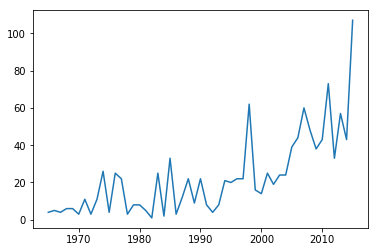

In [38]:
plt.plot(years, word_timeseries)
plt.show()

Hence, it's a good idea to take the total volume of words per year into consideration. 

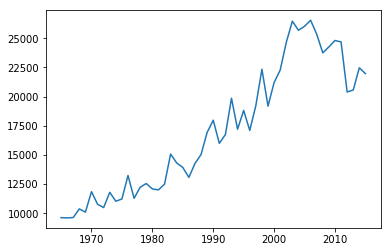

In [39]:
volume = []
for year in years:
    volume.append(cfreq[str(year)].N())
plt.plot(years, volume)
plt.show()

Strangely, the number of words per year increases over time (is this a data quality problem?). Therefore we should divide the frequency of `love` by the total number of words for each year.

In [40]:
word_timeseries_normalized = np.array(word_timeseries, dtype=np.float) / np.array(volume, dtype=np.float)
word_timeseries_normalized

array([4.15282392e-04, 5.20453836e-04, 4.14937759e-04, 5.78034682e-04,
       5.94059406e-04, 2.53036437e-04, 1.02059751e-03, 2.85877644e-04,
       9.32203390e-04, 2.35549918e-03, 3.56347439e-04, 1.88750472e-03,
       1.94897236e-03, 2.45178163e-04, 6.37247093e-04, 6.61649161e-04,
       4.16319734e-04, 8.00256082e-05, 1.65782493e-03, 1.39703828e-04,
       2.36864772e-03, 2.29375335e-04, 8.40866092e-04, 1.46305779e-03,
       5.31632111e-04, 1.22351371e-03, 4.99937508e-04, 2.38805970e-04,
       4.02758898e-04, 1.22036262e-03, 1.06292517e-03, 1.28617363e-03,
       1.14410526e-03, 2.77392510e-03, 8.33941416e-04, 6.60159381e-04,
       1.12218332e-03, 7.70884895e-04, 9.06823849e-04, 9.34361131e-04,
       1.49855908e-03, 1.65750019e-03, 2.36695728e-03, 2.02096754e-03,
       1.56636439e-03, 1.73317211e-03, 2.95654287e-03, 1.61796431e-03,
       2.77116048e-03, 1.91357750e-03, 4.87027765e-03])

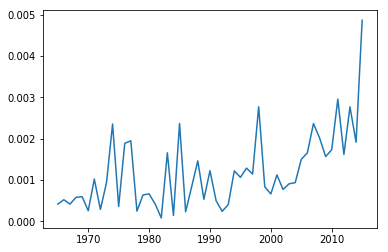

In [41]:
plt.plot(years, word_timeseries_normalized)
plt.show()

As we can see above, `love` peaked in the late 1970s and is on the decline since then. Sad.